In [40]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split 
from collections import Counter

In [20]:
dframe = pd.read_excel(r'C:\Users\Al-ameen\Downloads\TakenMind-CaseStudy.xlsx',sheet_name=None)

In [21]:
dframe.keys()

odict_keys(['INFO', 'Existing employees', 'Employees who have left', 'Presentation'])

In [22]:
Sheet1 = dframe['Employees who have left']
Sheet2 = dframe['Existing employees']

In [23]:
Sheet1.head()
Sheet2.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [24]:
Sheet1.info()
Sheet2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 10 columns):
Emp ID                   3571 non-null int64
satisfaction_level       3571 non-null float64
last_evaluation          3571 non-null float64
number_project           3571 non-null int64
average_montly_hours     3571 non-null int64
time_spend_company       3571 non-null int64
Work_accident            3571 non-null int64
promotion_last_5years    3571 non-null int64
dept                     3571 non-null object
salary                   3571 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 279.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11428 entries, 0 to 11427
Data columns (total 10 columns):
Emp ID                   11428 non-null int64
satisfaction_level       11428 non-null float64
last_evaluation          11428 non-null float64
number_project           11428 non-null int64
average_montly_hours     11428 non-null int64
time_spend_company       11428

In [25]:
Sheet1['Left/Stayed'] = 1
Sheet2['Left/Stayed'] = 0
Sheet = pd.concat([Sheet1, Sheet2], sort=False)
print(len(Sheet), len(Sheet1), len(Sheet2))

14999 3571 11428


In [26]:
Sheet.head()
Sheet.tail()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Left/Stayed
11423,14207,0.90,0.55,3,259,10,1,1,management,high,0
11424,14208,0.74,0.95,5,266,10,0,1,management,high,0
11425,14209,0.85,0.54,3,185,10,0,1,management,high,0
11426,14210,0.33,0.65,3,172,10,0,1,marketing,high,0
11427,14211,0.50,0.73,4,180,3,0,0,IT,low,0


In [27]:
Sheet.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Left/Stayed
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [42]:
#checking for the job satisfaction greater then 60%
jobsat=Sheet1[Sheet1["satisfaction_level"]>0.6]
print(((len(Sheet1)-len(jobsat))/len(Sheet1))*100,"% People are less than 60% satisfied by job")
print(jobsat["satisfaction_level"].mean())

72.80873704844582 % People are less than 60% satisfied by job
0.8127394438722952


In [43]:
#checking for the job satisfaction greater then 60%
job_sat=Sheet2[Sheet2["satisfaction_level"]>0.6]
print(((len(Sheet2)-len(job_sat))/len(Sheet2))*100,"% People are less than 60% satisfied by job")
print(job_sat["satisfaction_level"].mean())

36.13055652782639 % People are less than 60% satisfied by job
0.7987532538703787


In [57]:
#checking for the people who have left the job and their satisfaction
job_sat2=Sheet1[Sheet1["satisfaction_level"]>0.6]
print(len(job_sat2))
print(len(Sheet1))
print(((len(Sheet1)-len(job_sat2))/len(Sheet1))*100,"% People have left job when less than 60% satisfied by job")

971
3571
72.80873704844582 % People have left job when less than 60% satisfied by job


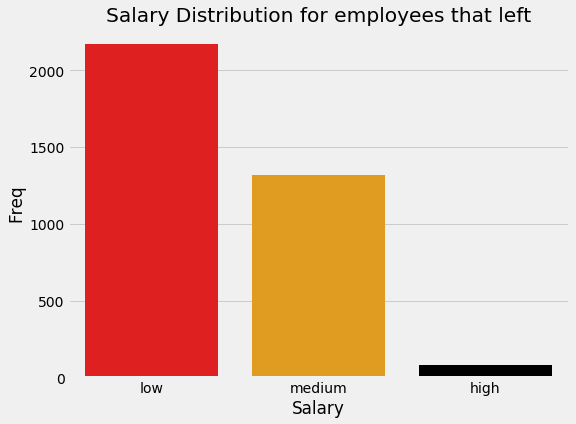

In [77]:
plt.figure(figsize=(8,6))
sns.countplot(Sheet1['salary'], palette=['red','orange','black'])
plt.title("Salary Distribution for employees that left")
plt.xlabel("Salary")
plt.ylabel("Freq")
plt.show()

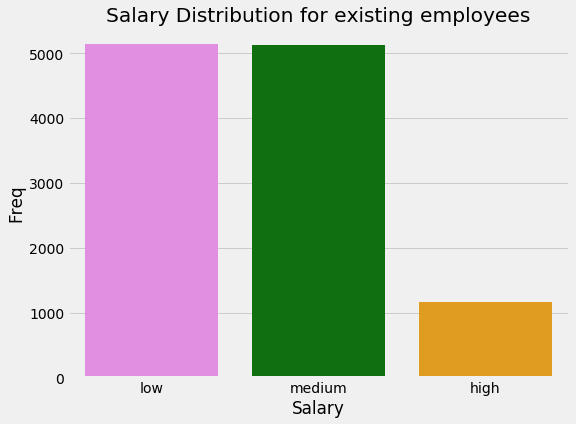

In [78]:
plt.figure(figsize=(8,6))
sns.countplot(Sheet2['salary'],palette=['violet','green','orange'])
plt.title("Salary Distribution for existing employees")
plt.xlabel("Salary")
plt.ylabel("Freq")
plt.show()

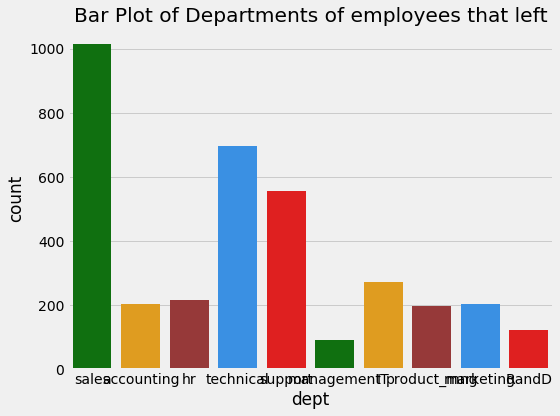

In [80]:
plt.figure(figsize=(8,6))
sns.countplot(Sheet1['dept'],palette=['green','orange','brown','dodgerblue','red'])
plt.title("Bar Plot of Departments of employees that left")
plt.tight_layout()

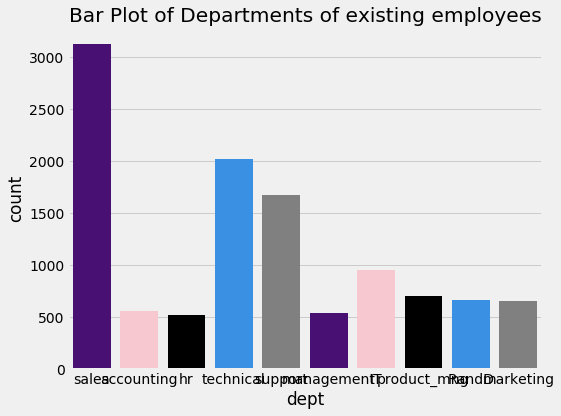

In [83]:
plt.figure(figsize=(8,6))
sns.countplot(Sheet2['dept'],palette=['indigo','pink','black','dodgerblue','grey'])
plt.title("Bar Plot of Departments of existing employees")
plt.tight_layout()

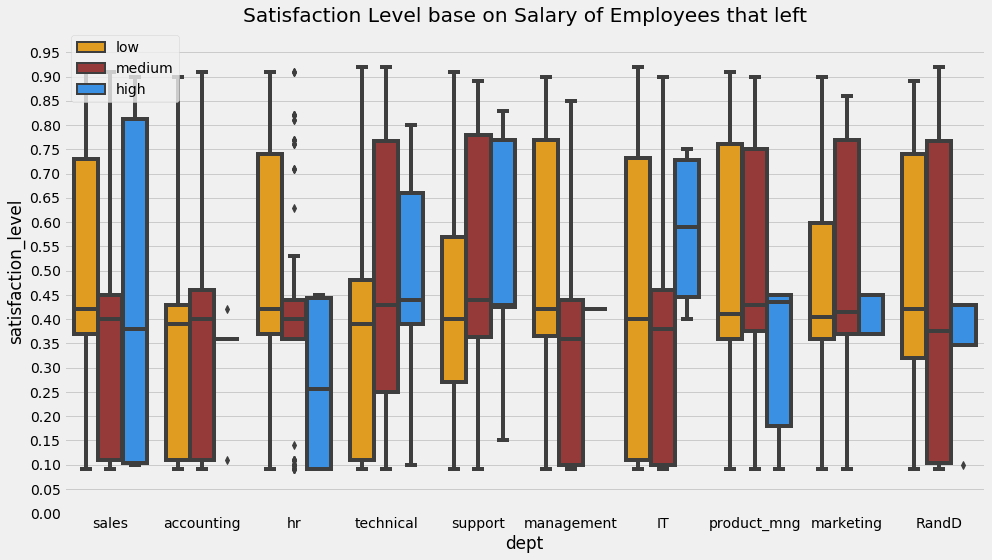

In [90]:
plt.figure(figsize=(14,8))
sns.boxplot(palette = ['orange','brown','dodgerblue'],x='dept',y='satisfaction_level',hue='salary',data=Sheet1)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.title("Satisfaction Level based on the salaries of employees that left")
plt.tight_layout()
plt.legend(loc=2)

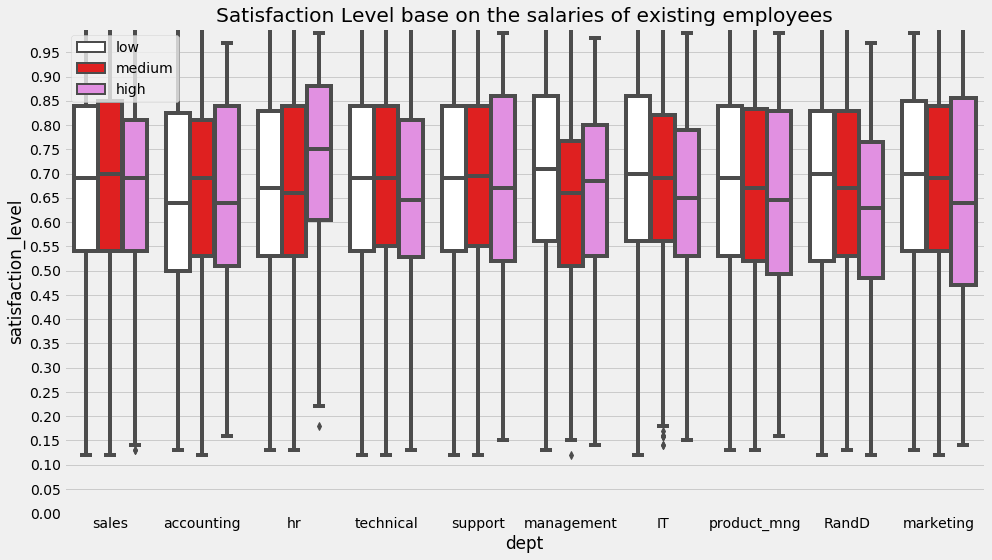

In [92]:
plt.figure(figsize=(14,8))
sns.boxplot(palette = ['white','red','violet'],x='dept',y='satisfaction_level',hue='salary',data=Sheet2)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.title("Satisfaction Level base on the salaries of existing employees")
plt.tight_layout()
plt.legend(loc=2)

Text(0.5,1,'Evaluation of employees that left based on  number of projects and time spent in company')

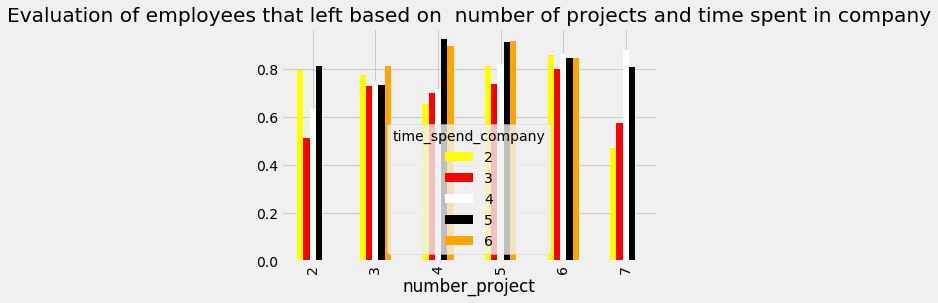

In [121]:
Sheet_1 = Sheet1.pivot_table(index='number_project',columns='time_spend_company', values='last_evaluation')
Sheet_1.plot(kind='bar',color = ['yellow','red','white','black','orange'])
plt.title("Evaluation of employees that left based on  number of projects and time spent in company")

Text(0.5,1,'Evaluation of employees that stayed based on  number of projects and time spent in company')

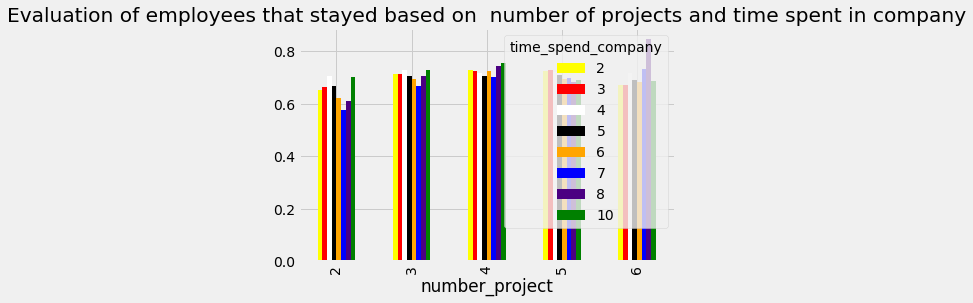

In [120]:
Sheet_2 = Sheet2.pivot_table(index='number_project',columns='time_spend_company', values='last_evaluation')
Sheet_2.plot(kind='bar',color = ['yellow','red','white','black','orange','blue','indigo','green'])
plt.title("Evaluation of employees that stayed based on  number of projects and time spent in company")

Text(0.5,1,'Satisfaction of employees that left based on Salary and promotion in the last 5 years')

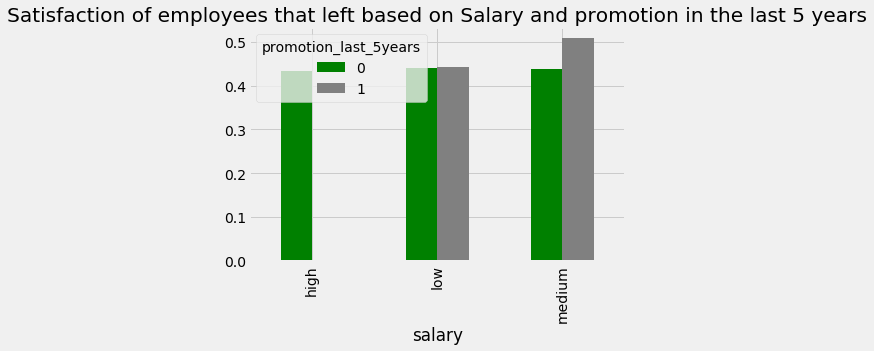

In [109]:
Sheet_1 = Sheet1.pivot_table(index='salary',columns='promotion_last_5years', values='satisfaction_level')
Sheet_1.plot(kind='bar',color = ['green','grey'])
plt.title("Satisfaction of employees that left based on Salary and promotion in the last 5 years")

Text(0.5,1,'Satisfaction of employees that stayed based on Salary and promotion in the last 5 years')

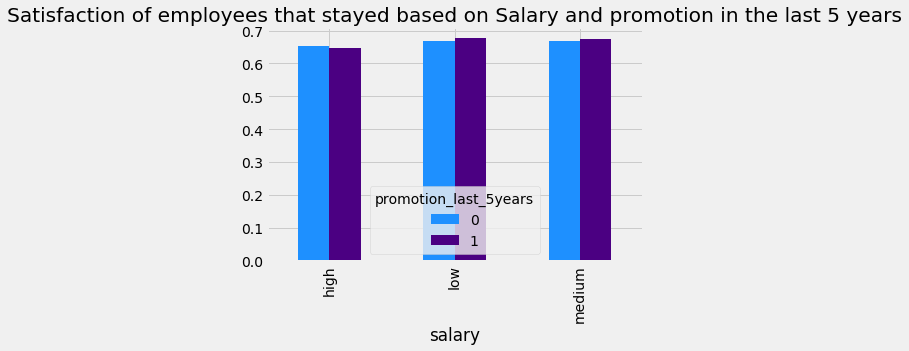

In [111]:
Sheet_2= Sheet2.pivot_table(index='salary',columns='promotion_last_5years', values='satisfaction_level')
Sheet_2.plot(kind='bar',color = ['dodgerblue','indigo'])
plt.title("Satisfaction of employees that stayed based on Salary and promotion in the last 5 years")

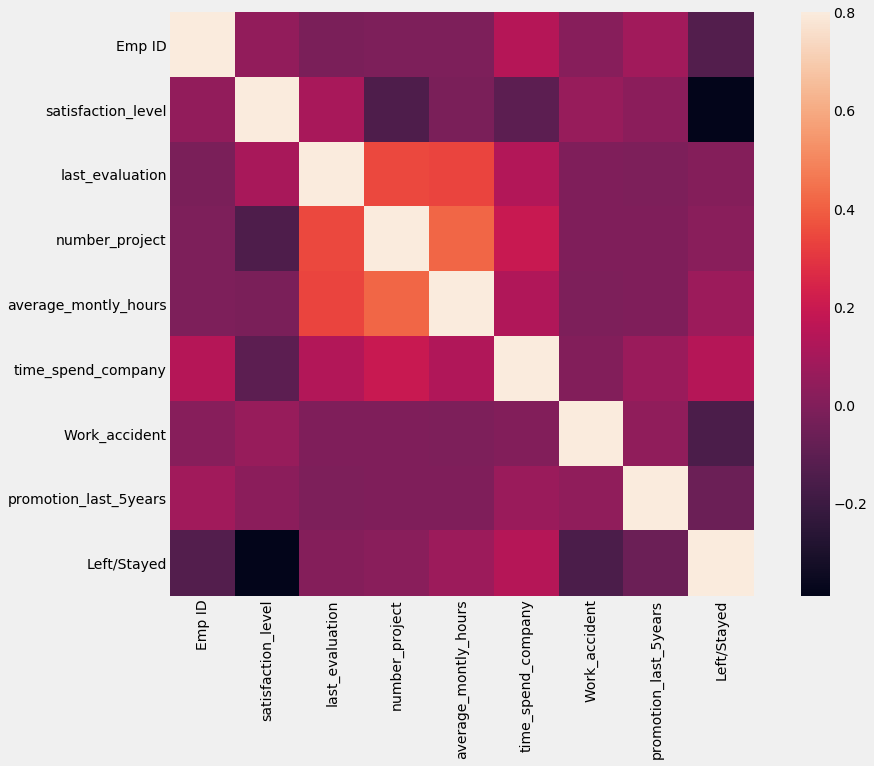

In [85]:
# Correlation matrix
corrmat = Sheet.corr()
fig = plt.figure(figsize = (15, 10))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

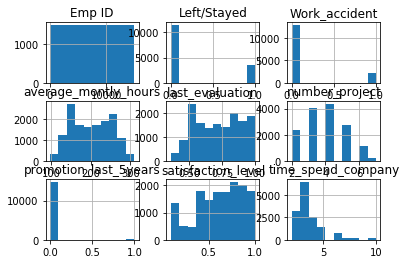

In [38]:
Sheet.hist()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE257AFC18>,
      dtype=object)

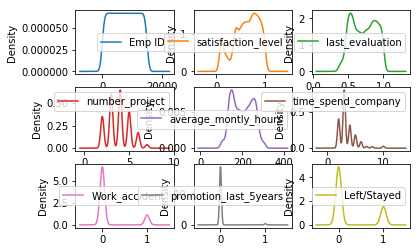

In [33]:
Sheet.plot(kind='density', subplots=True, layout=(3,3), sharex=False)

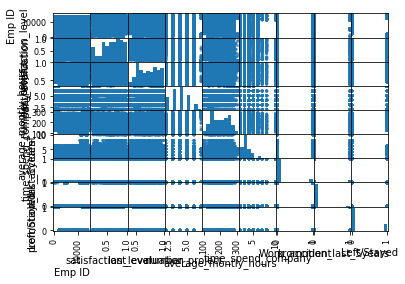

In [39]:
scatter_matrix(Sheet)
plt.show()

In [118]:
Sheet['Emp ID'],_ = pd.factorize(Sheet['Emp ID'])
Sheet['satisfaction_level'],_ = pd.factorize(Sheet['satisfaction_level'])
Sheet['last_evaluation'],_ = pd.factorize(Sheet['last_evaluation'])
Sheet['number_project'],_ = pd.factorize(Sheet['number_project'])
Sheet['average_montly_hours'],_ = pd.factorize(Sheet['average_montly_hours'])
Sheet['time_spend_company'],_ = pd.factorize(Sheet['time_spend_company'])
Sheet['Work_accident'],_ = pd.factorize(Sheet['Work_accident'])
Sheet['promotion_last_5years'],_ = pd.factorize(Sheet['promotion_last_5years'])
Sheet['dept'],_ = pd.factorize(Sheet['dept'])
Sheet['salary'],_ = pd.factorize(Sheet['salary'])

Sheet.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Left/Stayed
0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,1,1,1,1,0,0,0,1,1
2,2,2,2,2,2,2,0,0,0,1,1
3,3,3,3,1,3,3,0,0,0,0,1
4,4,4,4,0,4,0,0,0,0,0,1


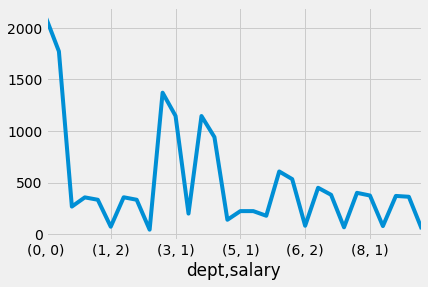

In [119]:
Sheet.groupby(["dept"])["salary"].value_counts().plot()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [14]:
X = Sheet.iloc[:,:-1]
y = Sheet.iloc[:,-1]

In [15]:
# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [17]:
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))


Misclassified samples: 0
Accuracy: 1.00
